### Import libraries

In [7]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(43)

__The learning curves: these are plots of the model’s performance on the training set and the validation set as a function of the training set size__

### Function for plotting learning curve

In [8]:
def plot_learning_curves(model, X, y):
    
    # split into train, test
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    # empty lists to store the error
    train_errors, val_errors = [], []
    
    step = 1
    for m in range(1, len(X_train), step):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    # plot
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.grid(True, linestyle="--")
    plt.legend()
    plt.title("Learning curve")
    plt.ylabel("Error")
    plt.xlabel("Number of training samples")
    plt.ylim(0, 8)

### Synthetic data

In [9]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [10]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

### Learning curves for different models

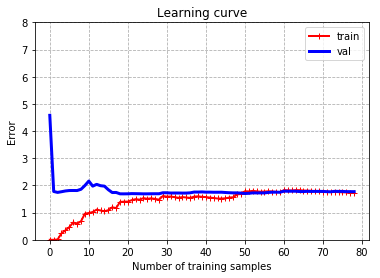

In [11]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

First, let’s look at the performance on the training data: when there are just one or two instances in the training set, the model can fit them perfectly, which is why the curve starts at zero. But as new instances are added to the training set, it becomes impossible for the model to fit the training data perfectly, both because the data is noisy and because it is not linear at all. So the error on the training data goes up until it reaches a plateau, at which point adding new instances to the training set doesn’t make the average error much better or worse.

Now let’s look at the performance of the model on the validation data. When the model is trained on very few training instances, it is incapable of generalizing properly, which is why the validation error is initially quite big. Then as the model is shown more training examples, it learns and thus the validation error slowly goes down. However, once again a straight line cannot do a good job modeling the data, so __the error ends up at a plateau, very close to the training curve.__

__These learning curves are typical of an underfitting model. Both curves have reached a plateau; they are close and fairly high__

### Polyfit with 10th degree

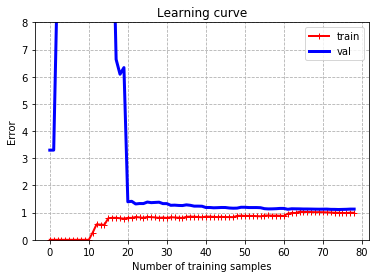

In [12]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline((
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("sgd_reg", LinearRegression()),
))

plot_learning_curves(polynomial_regression, X, y)

- Error on the training set is smaller than before, just around 1
- There is a gap between the curves. This means that the model performs significantly better on the training data than on the validation data, which is the hallmark of an __overfitting model__
- if you used a much larger training set, the two curves would continue to get closer.